In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
#import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

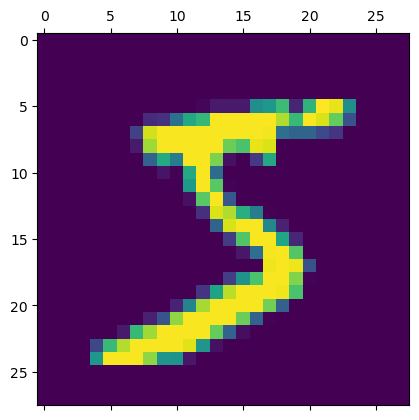

In [8]:
# how first image look
plt.matshow(x_train[0])

In [9]:
#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

In [10]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

C:\Users\SUJAY KHOND\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='sgd',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [46]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10, batch_size=128)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.3025 - val_accuracy: 0.9227 - val_loss: 0.2819
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2882 - val_accuracy: 0.9243 - val_loss: 0.2734
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - loss: 0.2760 - val_accuracy: 0.9269 - val_loss: 0.2658
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9241 - loss: 0.2752 - val_accuracy: 0.9290 - val_loss: 0.2601
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9260 - loss: 0.2654 - val_accuracy: 0.9308 - val_loss: 0.2528
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9296 - loss: 0.2557 - val_accuracy: 0.9320 - val_loss: 0.2464
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9278 - loss: 0.2568 - val_accuracy: 0.9331 - val_loss: 0.2414
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9311 - loss: 0.2498 - val_accuracy: 0.

In [47]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9247 - loss: 0.2633
Loss=0.228
Accuracy=0.936


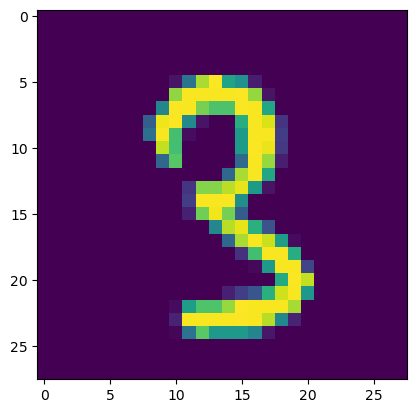

In [48]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [49]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
Handwritten number in the image is= 61140


In [50]:
history.history??

In [51]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

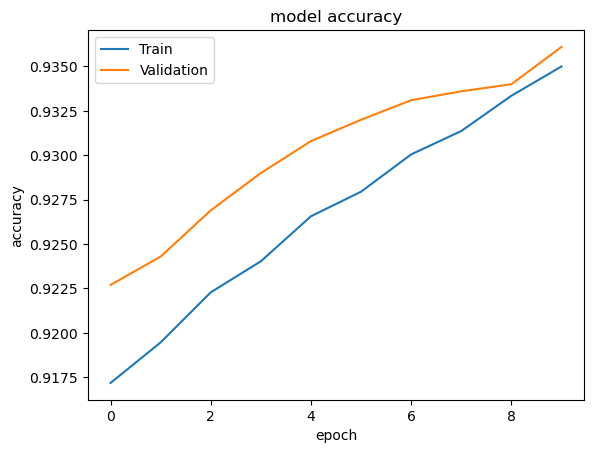

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

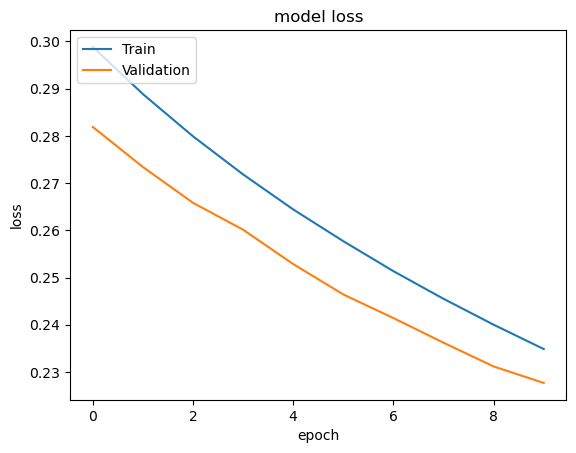

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


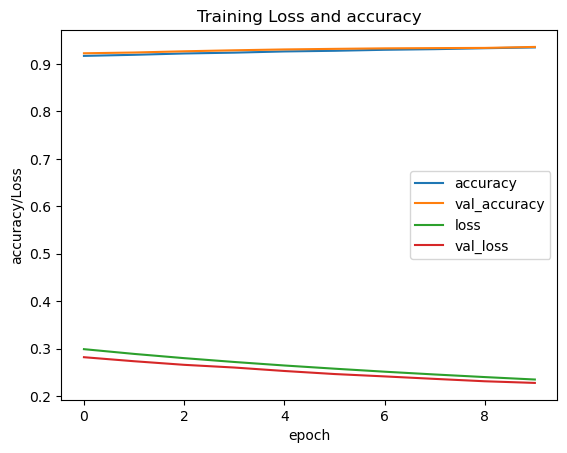

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()